# 3. 神经网络和多层感知机MLP



## 3.1. 感知机到神经网络，神经网络的基本结构

### 3.1.1 感知机

感知机模型是将若干输入加权求和并通过激活函数后输出的模型：

![img](./imgs/图片1.png)

感知机可以表示为线性变换+非线性激活函数：

$z=∑_{i=1}^{m}w_ix_i+b$

$sign(z) = \left\{ \begin{aligned} -1　 　z & < &0 \\ 1　　  z & >= &0  \end{aligned} \right. $

上述模型是一个二分类器，由于其过于简单，无法拟合复杂的非线性任务。

### 3.1.2 神经网络及其基本结构

神经网络则是基于这样的简单模型，将多个神经元逐层堆叠，由此形成我们的深度模型：

![image-20210707094933084](./imgs/图片2.png)

上图是一个最简单的神经网络，它包含神经网络的最基本结构：

​	输入层：对应输入向量的大小

​	输出层：对应模型任务，可以是二分类，多分类，也可以是回归任务等等

​	隐层：由多个感知机，即神经元组成，每个神经元对上层的所有输入做线性变换与非线性激活。

### 3.1.3 神经网络参数的定义

​	神经网络的隐层可以不止一层，宽度也可以很宽，一般来说，我们计算网络层数时不考虑输入层，所以下图是一个４层的神经网络，由于每层神经元连接到上层的所有输入，这个网络也叫做全连接网络，或多层感知机：

![img](./imgs/图片3.png)

​	由于网络中每层都有参数$w$和$b$，所以我们需要特定的方式进行定义：以下图一个三层的DNN为例，第二层的第4个神经元到第三层的第2个神经元的线性系数定义为$w^3_{24}$。上标3代表线性系数$w$所在的层数，而下标对应的是输出的第三层索引2和输入的第二层索引4。这样定义，每层进行的矩阵运算都可以表示为$w^Tx+b$。

![img](./imgs/图片4.png)

类似的偏置$b$，第二层的第三个神经元对应的偏倚定义为$b^2_3$。

![img](./imgs/图片5.png)

## 3.2. 前向传播

### 3.2.1 前向传播原理

上面讲到网络每层从输入到输出都可以表示为线性变换$z=w^Tx+b$与激活函数$\sigma(z)$，前向传播顾名思义就是从输入层开始，逐层计算输出，最终得到输出层的输出后结束。

<img src="./imgs/图片6.png" alt="img" style="zoom:60%;" />

​	例如第二层的输出$a^2_1,a^2_2,a^2_3$，我们有：

$a^2_1=σ(z^2_1)=σ(w^2_{11}x^1+w^2_{12}x^2+w^2_{13}x^3+b^2_1)$

$a^2_2=σ(z^2_2)=σ(w^2_{21}x^1+w^2_{22}x^2+w^2_{23}x^3+b^2_2)$

$a^2_3=σ(z^2_3)=σ(w^2_{31}x^1+w^2_{32}x^2+w^2_{33}x^3+b^2_3)$

​	对于第三层的的输出$a^3_1$，我们有：

$a^3_1=σ(z^3_1)=σ(w^3_{11}x^1+w^3_{12}x^2+w^3_{13}x^3+b^3_1)$

​	将上面的例子一般化，假设第$l−1$层共有m个神经元，则对于第$l$层的第j个神经元的输出$a^l_j$，我们有：

$a^l_j=σ(z^l_j)=σ(∑_{k=1}^mwl_{jk}a^{l−1}_k+b^l_j)$

为了简化表示，假设$l-1$层共有m个神经元，$l$层共有n个神经元，第$l$层的$w$组成了一个$n\times m$的矩阵$W^l$，那么第l层的输出可以表示为：

$a^l=σ(z^l)=σ(W^la^{l−1}+b^l)$

### 3.2.2 前向传播算法

前向传播算法也就是利用若干个权重系数矩阵$W$,偏倚向量$b$来和输入值向量$x$进行一系列线性运算和激活运算，从输入层开始，一层层的向后计算，一直到运算到输出层，得到输出结果为值。

　　　　输入: 总层数L，所有隐藏层和输出层对应的矩阵$W$,偏倚向量$b$，输入值向量$x$

　　　　输出：输出层的输出$a^L$

　　　　1） 初始化$a^1=x$

　　　　2)  for $l=2$ to $L$, 计算：

​						$a^l=σ(z^l)=σ(W^la^{l−1}+b^l)$

## 3.3. 反向传播

​	我们在定义了模型的结构后，神经网络的所有参数$W, b$都是随机的初始化状态，要想解决实际任务，我们必须令模型拟合我们的数据，也就是网络的训练过程。我们知道梯度下降法，它的意义是令参数向损失函数最大梯度的负方向移动，最终得到损失函数的局部最小，以此来拟合数据，而反向传播算法就是基于梯度下降，因为损失函数由最后一层的输出计算得到，所以梯度需要从最深层向最浅层传播，逐层计算梯度，以此来更新每层的参数。

### 3.3.1 反向传播基本概念

​	反向传播的第一步是正向传播，计算出网络每层的输出：$a^l=σ(z^l)=σ(W^la^{l−1}+b^l)$，得到最后一层输出$a^L$后，计算损失函数$J$，常用的损失函数有平方损失，交叉熵损失等

![image-20210707162616481](./imgs/图片7.png)

​	为了方便讲解，我们使用平方损失，对于每个样本，最小化下式：

$J(W,b,x,y)=\frac{1}{2}||a^L−y||^2$

​	对于输出层$a^L=σ(z^L)=σ(W^La^{L−1}+b^L)$，损失函数为$J(W,b,x,y)=\frac{1}{2}||a^L−y||^2=\frac{1}{2}||σ(W^La^{L−1}+b^L)−y||^2$

那么损失函数对于$W$和$b$的梯度可以按下式计算：

$\frac{∂J(W,b,x,y)}{∂W^L}=[(a^L−y)⊙σ′(z^L)](a^{L−1})^T$

$\frac{∂J(W,b,x,y)}{∂b^L}=(a^L−y)⊙σ′(z^L)$

$⊙$代表Hadamard积对于两个维度相同的向量$A（a1,a2,...an）^T$和$B（b1,b2,...bn）^T$,则$A⊙B=(a1b1,a2b2,...anbn)^T$。

$W,b$梯度的公共部分，也就是损失对$z^L$的梯度记为：

$δ^L=\frac {∂J(W,b,x,y)}{∂z^L}=(a^L−y)⊙σ′(z^L)$

得到了第L层的梯度后，继续计算$L-1$层及之前层的梯度，根据链式法则，前面任意一层$z^l$的梯度可以表示为：

$δ^l=\frac{∂J(W,b,x,y)}{∂z^l}=(\frac{∂z^L}{∂z^{L−1}}\frac{∂z^{L−1}}{∂z^{L−2}}...\frac{∂z^{l+1}}{∂z^l})^T\frac{∂J(W,b,x,y)}{∂z^L}$

当得到了深$l$层$z^L$的梯度后，很容易可以求得$l-1$层$W,  b$的梯度：

$\frac{∂J(W,b,x,y)}{∂W^l}=δ^l(a^{l−1})^T$

$\frac{∂J(W,b,x,y)}{∂b^l}=δ^l$

假设$δ^{L+1}$已经得到，现在求取$δ^{L}$：

$δl=\frac{∂J(W,b,x,y)}{∂z^l}=(\frac{∂z^{l+1}}{∂z^l})^T\frac{∂J(W,b,x,y)}{∂z^{l+1}}=(\frac{∂z^{l+1}}{∂z^l})^Tδ^{l+1}$

因为：

$z^{l+1}=W^{l+1}a^l+b^{l+1}=W^{l+1}σ(z^l)+b^{l+1}$

得到：

$\frac {∂z^{l+1}}{∂z^l}=W^{l+1} diag(σ′(z^l))$

代入得：

$δl=(\frac{∂z^{l+1}}{∂z^l})^Tδ^{l+1}=diag(σ′(z^l))(W^{l+1})^Tδ^{l+1}=(W^{l+1})^Tδ^{l+1}⊙σ′(z^l)$

### 3.3.2 反向传播算法

​	　输入: 总层数$L$，以及各隐藏层与输出层的神经元个数，损失函数，学习率α，epoch数MAX，输入的m个训练样本${(x1,y1),(x2,y2),...,(xm,ym)}{(x1,y1),(x2,y2),...,(xm,ym)}$

​	1) 初始化各隐藏层与输出层的线性关系系数矩阵$W$和偏倚向量$b$的值为一个随机值。

 	2）for iter to 1 to MAX：

​		2-1) for i =1 to m：

　　	a) 将DNN输入$a^1$设置为$x^i$

　　　b) for $l=2$ to $L$，进行前向传播算法计算	$a^{i,l}=σ(z^i,l)=σ(W^la^{i,l−1}+b^l)a^{i,l}=σ(z^{i,l})=σ(W^la^{i,l−1}+b^l)$

　　　c) 通过损失函数计算输出层的$δ^{i,L}$

　　　d) for $ l= L-1$ to 2, 进行反向传播算法计算$δ^{i,l}=(W^{l+1})^Tδ^{i,l+1}⊙σ′(z^{i,l})$

　　2-2) for $l = 2$ to $L$，更新第$l$层的$W^l, b^l$:

​			$W^l=W^l−α∑_{i=1}^{m}δ^{i,l}(a^{i,l−1})^T$

​			$b^l=b^l−α∑_{i=1}^{m}δ^{i,l}$

## 3.4. 激活函数

​	如果神经网络没有非线性的激活函数，那么网络中就只存在线性变换，网络就无法拟合复杂的非线性问题。

### 3.4.1 Sigmoid

Sigmoid函数：

$\sigma(z)=\frac{1}{1+e^{-z}}$

Sigmoid函数的导数：

$\sigma'(z)=(1-\sigma(z))\sigma(z)$

函数图像：

<img src="./imgs/图片8.png" alt="image-20210708093403075" style="zoom:30%;" />

优点：输出在01之间，适应于特定任务，也可以将数值很大的输入进行缩放；平滑，任意处可导。

缺点：

​	1. 在深度神经网络中梯度反向传递时导致梯度爆炸和梯度消失，其中梯度爆炸发生的概率非常小，而梯度消失发生的概率比较大，如下图导数图像，当输入很大或很小时，梯度趋近于0：

<img src="./imgs/图片9.png" alt="image-20210708093602513" style="zoom:50%;" />

 	2. 输出不是0均值，这会导致后一层的神经元将得到上一层输出的非0均值的信号作为输入，随着网络的加深，会改变数据的原始分布。
 	3. 计算量大。

### 3.4.2 tanh

tanh函数：

$tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

tanh导数：

$tanh'(x)=\frac{2}{1+e^{-2x}}-1$

函数曲线：

<img src="./imgs/图片10.png" alt="image-20210708094019481" style="zoom:60%;" />

导数曲线：

<img src="./imgs/图片11.png" alt="image-20210708094039328" style="zoom:60%;" />

优点：

 	1. 范围在-1,1之间，解决了非0均值的问题；

缺点：

 	1. 计算量大；
 	2. 梯度消失、梯度爆炸。

### 3.4.3 ReLU

ReLU函数：

$ReLU(x) = max(0,x)$

函数曲线：

<img src="./imgs/图片12.png" alt="image-20210708094617383" style="zoom:60%;" />

导数曲线：

<img src="./imgs/图片13.png" alt="image-20210708094635974" style="zoom:67%;" />

优点：

 	1. 正区间内导数都为1，缓解了梯度消失的问题；
 	2. 计算速度快；
 	3. 加快网络收敛。

缺点：

 	1. 不是0均值；
 	2. Dead ReLU Problem：某些神经元可能永远不会被激活，导致相应的参数永远不能被更新。

## 3.5. 使用Pytorch框架构建MLP 
环境：Pytorch  
设备：GPU  
数据集：MNIST

### 3.5.1 导入Pytorch包

In [1]:
# 导入包
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda

In [95]:
# 选择gpu或cpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### 3.5.2 加载MNIST数据集，创建训练集和测试集的DataLoader

In [96]:
# 加载数据集
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

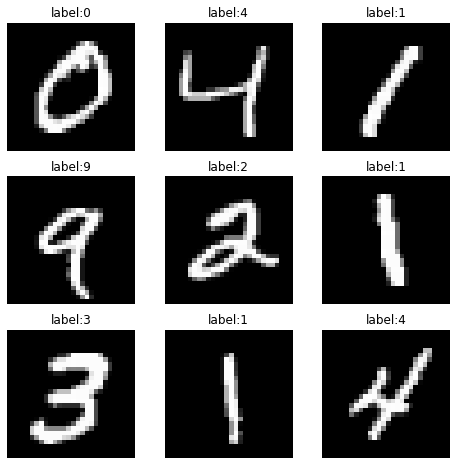

In [97]:
# 查看MNIST数据集
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img = train_dataloader.dataset[i][0]
    figure.add_subplot(rows, cols, i)
    plt.title('label:'+str(train_dataloader.dataset[i][1]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 3.5.3 设计MLP结构  
    我们的输入时图片的二维形式，首先需要将其扁平化，转换为一维矩阵，我们可以使用view函数，当然nn.Flatten()层也可以帮我们做这件事；  
    
    网络的主要部分由线性层Linear()和激活函数ReLU()组成，其中线性层要求每层的输入向量大小与上层的输出大小相同，最终的输出大小为类别个数，即10类。

In [105]:
# 定义网络
class MLP(nn.Module):
    '''
        MLP:共包含1个Flatten层，5个Linear层，激活函数为ReLU
    '''
    def __init__(self, cls_num):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fully_connected_layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, cls_num),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fully_connected_layers(x)
        return x

In [106]:
# 查看网络结构
model = MLP(10).cuda()
print("Model structure: ", model, "\n\n")

Model structure:  MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fully_connected_layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=10, bias=True)
  )
) 




### 3.5.4 定义超参数  
学习率：每次反向传播后网络参数更新的步长；  

批大小batch_size：mini-batch的大小，batch越大损失函数波动越小，但所需时间和内存更多；  

epoch：将训练集全部训练一遍的重复次数。

In [111]:
# 定义超参数
learning_rate = 1e-3
batch_size = 64
epoch = 10

### 3.5.5 损失函数和优化器  
损失函数：对于多分类问题我们选择交叉熵；  
优化器：一个好的优化器能加快训练，我们使用Adam优化器。

In [112]:
#定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

### 3.6.6 训练与测试

In [113]:
# 训练、测试
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch,  (x, y) in enumerate(dataloader):
        x, y = x.cuda(), y.cuda()
        pred = model(x) # 正向传播
        optimizer.zero_grad() # 梯度置零
        loss = loss_fn(pred, y) # 计算损失
        loss.backward() # 反向传播
        optimizer.step() # 更新参数
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(x)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, accuracy = 0, 0
    
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.cuda(), y.cuda()
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            accuracy += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= size
    accuracy /= size
    print(f'Accuracy: {(100*accuracy):>0.1f}%, Average Loss: {test_loss:>8f}\n')

In [114]:
#执行每个epoch
for i in range(epoch):
    print(f'Epoch {i}:')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 0:
loss:0.003964 [    0/60000]
loss:0.111697 [ 6400/60000]
loss:0.001530 [12800/60000]
loss:0.007487 [19200/60000]
loss:0.021410 [25600/60000]
loss:0.031708 [32000/60000]
loss:0.033676 [38400/60000]
loss:0.000934 [44800/60000]
loss:0.080093 [51200/60000]
loss:0.049658 [57600/60000]
Accuracy: 97.8%, Average Loss: 0.001699

Epoch 1:
loss:0.001914 [    0/60000]
loss:0.002409 [ 6400/60000]
loss:0.006600 [12800/60000]
loss:0.000101 [19200/60000]
loss:0.043018 [25600/60000]
loss:0.001259 [32000/60000]
loss:0.006554 [38400/60000]
loss:0.052096 [44800/60000]
loss:0.005402 [51200/60000]
loss:0.006541 [57600/60000]
Accuracy: 98.0%, Average Loss: 0.001516

Epoch 2:
loss:0.003596 [    0/60000]
loss:0.049215 [ 6400/60000]
loss:0.011896 [12800/60000]
loss:0.001325 [19200/60000]
loss:0.010697 [25600/60000]
loss:0.107927 [32000/60000]
loss:0.001971 [38400/60000]
loss:0.002728 [44800/60000]
loss:0.022347 [51200/60000]
loss:0.009136 [57600/60000]
Accuracy: 97.9%, Average Loss: 0.001577

Epoch 3:
l

In [115]:
# 在测试集上测试准确率 98.0%
test(test_dataloader, model, loss_fn)

Accuracy: 98.0%, Average Loss: 0.001813

